In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import sklearn
from mpl_toolkits import mplot3d
import math

In [2]:
df = pd.read_csv('2-9_Jan_2019.csv')

df_jan = pd.read_csv('all_usage_jan_2019.csv')
df_feb = pd.read_csv('all_usage_feb_2019.csv')
df_mar = pd.read_csv('all_usage_mar_2019.csv')
df_apr = pd.read_csv('all_usage_apr_2019.csv')
df_may = pd.read_csv('all_usage_may_2019.csv')
df_jun = pd.read_csv('all_usage_jun_2019.csv')
df_jul = pd.read_csv('all_usage_jul_2019.csv')
df_aug = pd.read_csv('all_usage_aug_2019.csv')
df_sep = pd.read_csv('all_usage_sep_2019.csv')

df_all = pd.read_csv('all_usage_Jan_to_Sep_new.csv')
df_merged = pd.read_csv('usage_and_failed_search_new.csv')
df_open = pd.read_csv('all_usage_open_new.csv')
df_open_merged = pd.read_csv('usage_and_failed_open_sem.csv')
df_close = pd.read_csv('all_usage_close_new.csv')
df_close_merged = pd.read_csv('usage_and_failed_close_sem.csv')

df_merged

,Date,regist_dt_ICT,start_dt_ICT,end_dt_ICT,Customer_ID,Station_depart.,Station_dest.
0,1/1/2019,08:45:50,NaN,NaN,CP#0R5H5,12 CU Terrace,12 CU Terrace
1,1/1/2019,14:07:45,NaN,NaN,CP#0T5S2,09 Chamchuri 10,13 Suan Luang square
2,2/1/2019,07:32:13,07:34:07,07:37:43,CP#0QR54,12 CU Terrace,11 BTS-National stadium
3,2/1/2019,08:10:53,08:17:34,08:24:25,CP#0Q033,11 BTS-National stadium,01 Exit to Cham square
4,2/1/2019,08:13:42,08:16:41,08:41:07,CP#0TCY3,02 Economics,07 Chamchuri 5
...,...,...,...,...,...,...,...
20135,30/9/2019,19:51:28,19:52:58,20:12:13,CP#0WPM8,15 U Center,10 Chulapat 14
20136,30/9/2019,20:03:28,20:14:34,20:20:44,CP#0WDZ0,09 Chamchuri 10,06 Chamchuri 9
20137,30/9/2019,20:04:33,NaN,NaN,CP#0WDZ0,09 Chamchuri 10,06 Chamchuri 9
20138,30/9/2019,20:07:32,20:26:07,20:35:11,CP#0WD52,01 Exit to Cham square,08 Witthaya Nives


In [3]:
mon = ['7/1/2019', '14/1/2019', '21/1/2019', '28/1/2019', '4/2/2019', '11/2/2019', '18/2/2019', '25/2/2019', '4/3/2019', '11/3/2019', '18/3/2019', '25/3/2019', '1/4/2019', '22/4/2019', '29/4/2019', '13/5/2019', '27/5/2019', '10/6/2019', '17/6/2019', '24/6/2019', '1/7/2019', '8/7/2019', '15/7/2019', '22/7/2019', '5/8/2019', '12/8/2019', '19/8/2019', '26/8/2019', '2/9/2019', '9/9/2019', '16/9/2019', '23/9/2019', '30/9/2019']
tue = ['8/1/2019', '15/1/2019', '22/1/2019', '29/1/2019', '5/2/2019', '12/2/2019', '26/2/2019', '5/3/2019', '12/3/2019', '19/3/2019', '26/3/2019', '2/4/2019', '9/4/2019', '23/4/2019', '30/4/2019', '7/5/2019', '14/5/2019', '21/5/2019', '28/5/2019', '4/6/2019', '11/6/2019', '18/6/2019', '25/6/2019', '2/7/2019', '9/7/2019', '23/7/2019', '30/7/2019', '6/8/2019', '13/8/2019', '20/8/2019', '27/8/2019', '3/9/2019', '10/9/2019', '17/9/2019', '24/9/2019']
wed = ['2/1/2019', '9/1/2019', '16/1/2019', '23/1/2019', '30/1/2019', '6/2/2019', '13/2/2019', '20/2/2019', '27/2/2019', '6/3/2019', '13/3/2019', '20/3/2019', '27/3/2019', '3/4/2019', '10/4/2019', '17/4/2019', '24/4/2019', '1/5/2019', '8/5/2019', '15/5/2019', '22/5/2019', '29/5/2019', '5/6/2019', '12/6/2019', '19/6/2019', '26/6/2019', '3/7/2019', '10/7/2019', '24/7/2019', '31/7/2019', '7/8/2019', '14/8/2019', '21/8/2019', '28/8/2019', '4/9/2019', '11/9/2019', '18/9/2019', '25/9/2019']
thu = ['3/1/2019', '10/1/2019', '17/1/2019', '24/1/2019', '31/1/2019', '7/2/2019', '14/2/2019', '21/2/2019', '28/2/2019', '7/3/2019', '14/3/2019', '21/3/2019', '28/3/2019', '4/4/2019', '11/4/2019', '18/4/2019', '25/4/2019', '2/5/2019', '16/5/2019', '23/5/2019', '30/5/2019', '6/6/2019', '13/6/2019', '20/6/2019', '27/6/2019', '4/7/2019', '11/7/2019', '18/7/2019', '25/7/2019', '1/8/2019', '8/8/2019', '15/8/2019', '22/8/2019', '29/8/2019', '5/9/2019', '12/9/2019', '19/9/2019', '26/9/2019']
fri = ['4/1/2019', '11/1/2019', '18/1/2019', '25/1/2019', '1/2/2019', '8/2/2019', '15/2/2019', '22/2/2019', '1/3/2019', '8/3/2019', '15/3/2019', '22/3/2019', '29/3/2019', '5/4/2019', '19/4/2019', '26/4/2019', '3/5/2019', '10/5/2019', '17/5/2019', '24/5/2019', '31/5/2019', '7/6/2019', '14/6/2019', '21/6/2019', '28/6/2019', '5/7/2019', '12/7/2019', '19/7/2019', '26/7/2019', '2/8/2019', '9/8/2019', '16/8/2019', '23/8/2019', '30/8/2019', '6/9/2019', '13/9/2019', '20/9/2019', '27/9/2019']

day = []
for slot in df_all['Date']:
    if slot in mon:
        day.append('mon')
    if slot in tue:
        day.append('tue')
    if slot in wed:
        day.append('wed')
    if slot in thu:
        day.append('thu')
    if slot in fri:
        day.append('fri')
df_all['day'] = day

In [4]:
mon.extend(tue)
mon.extend(wed)
mon.extend(thu)
mon.extend(fri)
list(set((list(dict.fromkeys(df_merged['Date']))))-set(mon))

['8/4/2019',
 '15/4/2019',
 '6/5/2019',
 '20/5/2019',
 '5/1/2019',
 '12/4/2019',
 '9/5/2019',
 '22/6/2019',
 '1/1/2019',
 '16/4/2019']

In [30]:
mon_merged = ['7/1/2019', '14/1/2019', '21/1/2019', '28/1/2019', '4/2/2019', '11/2/2019', '18/2/2019', '25/2/2019', '4/3/2019', '11/3/2019', '18/3/2019', '25/3/2019', '1/4/2019', '8/4/2019', '15/4/2019', '22/4/2019', '29/4/2019', '6/5/2019', '13/5/2019', '20/5/2019', '27/5/2019', '10/6/2019', '17/6/2019', '24/6/2019', '1/7/2019', '8/7/2019', '15/7/2019', '22/7/2019', '5/8/2019', '12/8/2019', '19/8/2019', '26/8/2019', '2/9/2019', '9/9/2019', '16/9/2019', '23/9/2019', '30/9/2019']
tue_merged = ['1/1/2019', '8/1/2019', '15/1/2019', '22/1/2019', '29/1/2019', '5/2/2019', '12/2/2019', '26/2/2019', '5/3/2019', '12/3/2019', '19/3/2019', '26/3/2019', '2/4/2019', '9/4/2019', '16/4/2019', '23/4/2019', '30/4/2019', '7/5/2019', '14/5/2019', '21/5/2019', '28/5/2019', '4/6/2019', '11/6/2019', '18/6/2019', '25/6/2019', '2/7/2019', '9/7/2019', '23/7/2019', '30/7/2019', '6/8/2019', '13/8/2019', '20/8/2019', '27/8/2019', '3/9/2019', '10/9/2019', '17/9/2019', '24/9/2019']
wed_merged = ['2/1/2019', '9/1/2019', '16/1/2019', '23/1/2019', '30/1/2019', '6/2/2019', '13/2/2019', '20/2/2019', '27/2/2019', '6/3/2019', '13/3/2019', '20/3/2019', '27/3/2019', '3/4/2019', '10/4/2019', '17/4/2019', '24/4/2019', '1/5/2019', '8/5/2019', '15/5/2019', '22/5/2019', '29/5/2019', '5/6/2019', '12/6/2019', '19/6/2019', '26/6/2019', '3/7/2019', '10/7/2019', '24/7/2019', '31/7/2019', '7/8/2019', '14/8/2019', '21/8/2019', '28/8/2019', '4/9/2019', '11/9/2019', '18/9/2019', '25/9/2019']
thu_merged = ['3/1/2019', '10/1/2019', '17/1/2019', '24/1/2019', '31/1/2019', '7/2/2019', '14/2/2019', '21/2/2019', '28/2/2019', '7/3/2019', '14/3/2019', '21/3/2019', '28/3/2019', '4/4/2019', '11/4/2019', '18/4/2019', '25/4/2019', '2/5/2019', '9/5/2019', '16/5/2019', '23/5/2019', '30/5/2019', '6/6/2019', '13/6/2019', '20/6/2019', '27/6/2019', '4/7/2019', '11/7/2019', '18/7/2019', '25/7/2019', '1/8/2019', '8/8/2019', '15/8/2019', '22/8/2019', '29/8/2019', '5/9/2019', '12/9/2019', '19/9/2019', '26/9/2019']
fri_merged = ['4/1/2019', '11/1/2019', '18/1/2019', '25/1/2019', '1/2/2019', '8/2/2019', '15/2/2019', '22/2/2019', '1/3/2019', '8/3/2019', '15/3/2019', '22/3/2019', '29/3/2019', '5/4/2019', '12/4/2019', '19/4/2019', '26/4/2019', '3/5/2019', '10/5/2019', '17/5/2019', '24/5/2019', '31/5/2019', '7/6/2019', '14/6/2019', '21/6/2019', '28/6/2019', '5/7/2019', '12/7/2019', '19/7/2019', '26/7/2019', '2/8/2019', '9/8/2019', '16/8/2019', '23/8/2019', '30/8/2019', '6/9/2019', '13/9/2019', '20/9/2019', '27/9/2019']
sat_merged = ['5/1/2019', '22/6/2019']

day = []
for slot in df_merged['Date']:
    if slot in mon_merged:
        day.append('1 - mon')
    if slot in tue_merged:
        day.append('2 - tue')
    if slot in wed_merged:
        day.append('3 - wed')
    if slot in thu_merged:
        day.append('4 - thu')
    if slot in fri_merged:
        day.append('5 - fri')
    if slot in sat_merged:
        day.append('6 - sat')
df_merged['Day'] = day

month = []
for slot in df_merged['Date']:
    (d, m, y) = slot.split('/')
    m = int(m)
    if (m == 1):
        month.append('1 (Jan)')
    elif (m == 2):
        month.append('2 (Feb)')
    elif (m == 3):
        month.append('3 (Mar)')
    elif (m == 4):
        month.append('4 (Apr)')
    elif (m == 5):
        month.append('5 (May)')
    elif (m == 6):
        month.append('6 (Jun)')
    elif (m == 7):
        month.append('7 (Jul)')
    elif (m == 8):
        month.append('8 (Aug)')
    elif (m == 9):
        month.append('9 (Sep)')
df_merged['Month'] = month

demand = []
demand = [1] * len(df_merged)
df_merged['Demand'] = demand

converted_regist = []
for slot in df_merged['regist_dt_ICT']:
    (h, m, s) = slot.split(':')
    cell = int(h) + int(m)/60 + int(s)/3600
    converted_regist.append(math.floor(cell))    
df_merged['Converted_Regist'] = converted_regist

df_merged

,Date,regist_dt_ICT,start_dt_ICT,end_dt_ICT,Customer_ID,Station_depart.,Station_dest.,Day,Month,Demand,Converted_Regist,Station_depart_int,Station_dest_int,Day_int,Month_int
0,1/1/2019,08:45:50,NaN,NaN,CP#0R5H5,12 CU Terrace,12 CU Terrace,2 - tue,1 (Jan),1,8,12,12,2,1
1,1/1/2019,14:07:45,NaN,NaN,CP#0T5S2,09 Chamchuri 10,13 Suan Luang square,2 - tue,1 (Jan),1,14,9,13,2,1
2,2/1/2019,07:32:13,07:34:07,07:37:43,CP#0QR54,12 CU Terrace,11 BTS-National stadium,3 - wed,1 (Jan),1,7,12,11,3,1
3,2/1/2019,08:10:53,08:17:34,08:24:25,CP#0Q033,11 BTS-National stadium,01 Exit to Cham square,3 - wed,1 (Jan),1,8,11,1,3,1
4,2/1/2019,08:13:42,08:16:41,08:41:07,CP#0TCY3,02 Economics,07 Chamchuri 5,3 - wed,1 (Jan),1,8,2,7,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20135,30/9/2019,19:51:28,19:52:58,20:12:13,CP#0WPM8,15 U Center,10 Chulapat 14,1 - mon,9 (Sep),1,19,15,10,1,9
20136,30/9/2019,20:03:28,20:14:34,20:20:44,CP#0WDZ0,09 Chamchuri 10,06 Chamchuri 9,1 - mon,9 (Sep),1,20,9,6,1,9
20137,30/9/2019,20:04:33,NaN,NaN,CP#0WDZ0,09 Chamchuri 10,06 Chamchuri 9,1 - mon,9 (Sep),1,20,9,6,1,9
20138,30/9/2019,20:07:32,20:26:07,20:35:11,CP#0WD52,01 Exit to Cham square,08 Witthaya Nives,1 - mon,9 (Sep),1,20,1,8,1,9


In [6]:
day = []
for slot in df_open_merged['Date']:
    if slot in mon_merged:
        day.append('1 - mon')
    if slot in tue_merged:
        day.append('2 - tue')
    if slot in wed_merged:
        day.append('3 - wed')
    if slot in thu_merged:
        day.append('4 - thu')
    if slot in fri_merged:
        day.append('5 - fri')
    if slot in sat_merged:
        day.append('6 - sat')
df_open_merged['Day'] = day

month = []
for slot in df_open_merged['Date']:
    (d, m, y) = slot.split('/')
    m = int(m)
    if (m == 1):
        month.append('1 (Jan)')
    elif (m == 2):
        month.append('2 (Feb)')
    elif (m == 3):
        month.append('3 (Mar)')
    elif (m == 4):
        month.append('4 (Apr)')
    elif (m == 5):
        month.append('5 (May)')
    elif (m == 8):
        month.append('8 (Aug)')
    elif (m == 9):
        month.append('9 (Sep)')
df_open_merged['Month'] = month

demand = []
demand = [1] * len(df_open_merged)
df_open_merged['Demand'] = demand 

df_open_merged

,Date,regist_dt_ICT,start_dt_ICT,end_dt_ICT,Customer_ID,Station_depart.,Station_dest.,Day,Month,Demand
0,1/1/2019,08:45:50,NaN,NaN,CP#0R5H5,12 CU Terrace,12 CU Terrace,2 - tue,1 (Jan),1
1,1/1/2019,14:07:45,NaN,NaN,CP#0T5S2,09 Chamchuri 10,13 Suan Luang square,2 - tue,1 (Jan),1
2,2/1/2019,07:32:13,07:34:07,07:37:43,CP#0QR54,12 CU Terrace,11 BTS-National stadium,3 - wed,1 (Jan),1
3,2/1/2019,08:10:53,08:17:34,08:24:25,CP#0Q033,11 BTS-National stadium,01 Exit to Cham square,3 - wed,1 (Jan),1
4,2/1/2019,08:13:42,08:16:41,08:41:07,CP#0TCY3,02 Economics,07 Chamchuri 5,3 - wed,1 (Jan),1
...,...,...,...,...,...,...,...,...,...,...
15454,30/9/2019,19:51:28,19:52:58,20:12:13,CP#0WPM8,15 U Center,10 Chulapat 14,1 - mon,9 (Sep),1
15455,30/9/2019,20:03:28,20:14:34,20:20:44,CP#0WDZ0,09 Chamchuri 10,06 Chamchuri 9,1 - mon,9 (Sep),1
15456,30/9/2019,20:04:33,NaN,NaN,CP#0WDZ0,09 Chamchuri 10,06 Chamchuri 9,1 - mon,9 (Sep),1
15457,30/9/2019,20:07:32,20:26:07,20:35:11,CP#0WD52,01 Exit to Cham square,08 Witthaya Nives,1 - mon,9 (Sep),1


In [7]:
day = []
for slot in df_close_merged['Date']:
    if slot in mon_merged:
        day.append('1 - mon')
    if slot in tue_merged:
        day.append('2 - tue')
    if slot in wed_merged:
        day.append('3 - wed')
    if slot in thu_merged:
        day.append('4 - thu')
    if slot in fri_merged:
        day.append('5 - fri')
    if slot in sat_merged:
        day.append('6 - sat')
df_close_merged['Day'] = day

month = []
for slot in df_close_merged['Date']:
    (d, m, y) = slot.split('/')
    m = int(m)
    if (m == 5):
        month.append('5 (May)')
    elif (m == 6):
        month.append('6 (Jun)')
    elif (m == 7):
        month.append('7 (Jul)')
    elif (m == 8):
        month.append('8 (Aug)')
df_close_merged['Month'] = month

demand = []
demand = [1] * len(df_close_merged)
df_close_merged['Demand'] = demand 

df_close_merged

,Date,regist_dt_ICT,start_dt_ICT,end_dt_ICT,Customer_ID,Station_depart.,Station_dest.,Day,Month,Demand
0,23/5/2019,07:01:33,07:08:59,07:14:46,CP#0PZ27,11 BTS-National stadium,07 Chamchuri 5,4 - thu,5 (May),1
1,23/5/2019,07:10:02,07:17:42,07:30:01,CP#0PL00,07 Chamchuri 5,01 Exit to Cham square,4 - thu,5 (May),1
2,23/5/2019,07:10:44,07:11:03,07:17:32,CP#0PBX0,12 CU Terrace,04 Engineering,4 - thu,5 (May),1
3,23/5/2019,07:17:32,07:18:00,07:21:27,CP#0QR54,12 CU Terrace,11 BTS-National stadium,4 - thu,5 (May),1
4,23/5/2019,07:17:51,NaN,NaN,CP#0PBX0,12 CU Terrace,04 Engineering,4 - thu,5 (May),1
...,...,...,...,...,...,...,...,...,...,...
4676,9/8/2019,18:10:04,18:11:45,18:18:47,CP#0SG46,22 Siam Square Soi 8,01 Exit to Cham square,5 - fri,8 (Aug),1
4677,12/8/2019,11:12:49,11:37:51,11:49:47,CP#0S3R8,20 Veterinary Science,15 U Center,1 - mon,8 (Aug),1
4678,12/8/2019,15:12:45,15:13:26,15:28:43,CP#0P6J3,01 Exit to Cham square,11 BTS-National stadium,1 - mon,8 (Aug),1
4679,12/8/2019,18:34:35,18:35:17,18:43:02,CP#0VCF0,12 CU Terrace,22 Siam Square Soi 8,1 - mon,8 (Aug),1


In [8]:
pd.crosstab(df_merged['Station_depart.'], df_merged['Converted_Regist'])

# df_merged_d = df_merged[df_merged['Date'] == '2/1/2019']
# pd.crosstab(df_merged_d['Station_depart.'], df_merged_d['Converted_Regist'])

# df_merged_dt = df_merged_d[df_merged_d['Converted_Regist'] == 7]
# pd.crosstab(df_merged_dt['Station_depart.'], df_merged_dt['Converted_Regist'])

# df_merged_s = df_merged[df_merged['Station_depart.'] == '01 Exit to Cham square']
# pd.crosstab(df_merged_s['Station_depart.'], df_merged_s['Converted_Regist'])

Converted_Regist,7,8,9,10,11,12,13,14,15,16,17,18,19,20,23
Station_depart.,,,,,,,,,,,,,,,
01 Exit to Cham square,115,178,171,82,119,211,143,116,244,374,220,179,47,32,0
02 Economics,31,70,73,43,80,203,143,151,328,448,186,130,32,21,0
03 Sala Prakeaw,8,33,37,47,74,142,98,130,274,356,182,142,34,29,0
04 Engineering,19,34,50,74,173,194,154,159,321,396,169,86,28,18,0
05 Arts,5,27,20,25,43,89,61,49,115,174,62,46,12,7,0
06 Chamchuri 9,18,64,62,60,40,89,78,69,83,96,80,122,19,25,0
07 Chamchuri 5,19,32,36,47,69,96,86,64,117,117,82,76,21,9,0
08 Witthaya Nives,85,102,121,67,64,94,45,43,42,65,44,46,9,7,1
09 Chamchuri 10,33,44,54,50,98,119,65,66,100,145,66,41,21,31,0


In [17]:
depart_station_int = []
for station in df_merged['Station_depart.']:
    depart_station_int.append(int(station[0:2]))
df_merged['Station_depart_int'] = depart_station_int

dest_station_int = []
for station in df_merged['Station_dest.']:
    dest_station_int.append(int(station[0:2]))
df_merged['Station_dest_int'] = dest_station_int

day_int = []
for slot in df_merged['Date']:
    if slot in mon_merged:
        day_int.append(1)
    if slot in tue_merged:
        day_int.append(2)
    if slot in wed_merged:
        day_int.append(3)
    if slot in thu_merged:
        day_int.append(4)
    if slot in fri_merged:
        day_int.append(5)
    if slot in sat_merged:
        day_int.append(6)
df_merged['Day_int'] = day_int

month_int = []
for slot in df_merged['Date']:
    (d, m, y) = slot.split('/')
    m = int(m)
    if (m == 1):
        month_int.append(1)
    elif (m == 2):
        month_int.append(2)
    elif (m == 3):
        month_int.append(3)
    elif (m == 4):
        month_int.append(4)
    elif (m == 5):
        month_int.append(5)
    elif (m == 6):
        month_int.append(6)
    elif (m == 7):
        month_int.append(7)
    elif (m == 8):
        month_int.append(8)
    elif (m == 9):
        month_int.append(9)
df_merged['Month_int'] = month_int

df_merged
# converted_station_str = []
# for station in df_merged['Station_depart.']:
#     converted_station_str.append(station[0:2])

# df_merged['Converted_Station_str'] = converted_station_str

# plt.figure(figsize=(20,10))
# plt.scatter(df_merged['Converted_Station_str'], df_merged['Converted_Regist'])
# plt.show()

,Date,regist_dt_ICT,start_dt_ICT,end_dt_ICT,Customer_ID,Station_depart.,Station_dest.,Day,Month,Demand,Converted_Regist,Station_depart_int,Station_dest_int,Day_int,Month_int
0,1/1/2019,08:45:50,NaN,NaN,CP#0R5H5,12 CU Terrace,12 CU Terrace,2 - tue,1 (Jan),1,8,12,12,2,1
1,1/1/2019,14:07:45,NaN,NaN,CP#0T5S2,09 Chamchuri 10,13 Suan Luang square,2 - tue,1 (Jan),1,14,9,13,2,1
2,2/1/2019,07:32:13,07:34:07,07:37:43,CP#0QR54,12 CU Terrace,11 BTS-National stadium,3 - wed,1 (Jan),1,7,12,11,3,1
3,2/1/2019,08:10:53,08:17:34,08:24:25,CP#0Q033,11 BTS-National stadium,01 Exit to Cham square,3 - wed,1 (Jan),1,8,11,1,3,1
4,2/1/2019,08:13:42,08:16:41,08:41:07,CP#0TCY3,02 Economics,07 Chamchuri 5,3 - wed,1 (Jan),1,8,2,7,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20135,30/9/2019,19:51:28,19:52:58,20:12:13,CP#0WPM8,15 U Center,10 Chulapat 14,1 - mon,9 (Sep),1,19,15,10,1,9
20136,30/9/2019,20:03:28,20:14:34,20:20:44,CP#0WDZ0,09 Chamchuri 10,06 Chamchuri 9,1 - mon,9 (Sep),1,20,9,6,1,9
20137,30/9/2019,20:04:33,NaN,NaN,CP#0WDZ0,09 Chamchuri 10,06 Chamchuri 9,1 - mon,9 (Sep),1,20,9,6,1,9
20138,30/9/2019,20:07:32,20:26:07,20:35:11,CP#0WD52,01 Exit to Cham square,08 Witthaya Nives,1 - mon,9 (Sep),1,20,1,8,1,9


Converted_Regist,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Day,,,,,,,,,,,,,,
1 - mon,36,21,26,19,20,42,23,19,50,65,35,32,12,8
2 - tue,11,39,40,17,17,24,18,23,47,81,36,35,11,1
3 - wed,24,44,47,15,23,38,31,17,64,92,41,29,7,2
4 - thu,21,34,29,20,31,47,37,24,42,77,62,46,8,12
5 - fri,23,39,28,11,28,60,34,32,41,59,45,37,9,9
6 - sat,0,1,1,0,0,0,0,1,0,0,1,0,0,0


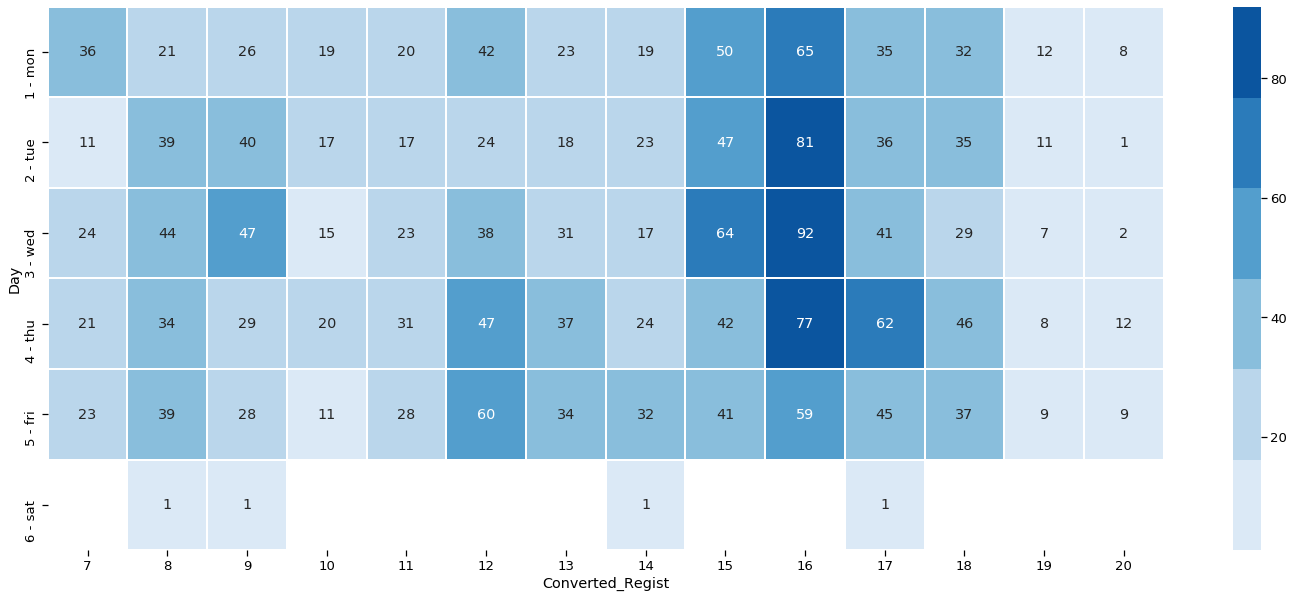

In [10]:
#demand of each station each day in Jan
df_merged_s = df_merged[df_merged['Station_depart.'] == '01 Exit to Cham square']
# df_merged_sd = df_merged_s[df_merged_s['Station_depart.'] == '01 Exit to Cham square']

df_merged_hm = df_merged_s.pivot_table(index='Day', columns='Converted_Regist', values='Demand', aggfunc=np.sum)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df_merged_hm, cmap=sns.color_palette("Blues"), annot=True, fmt='.0f', linewidths = 1)
pd.crosstab(df_merged_s['Day'], df_merged_s['Converted_Regist'])

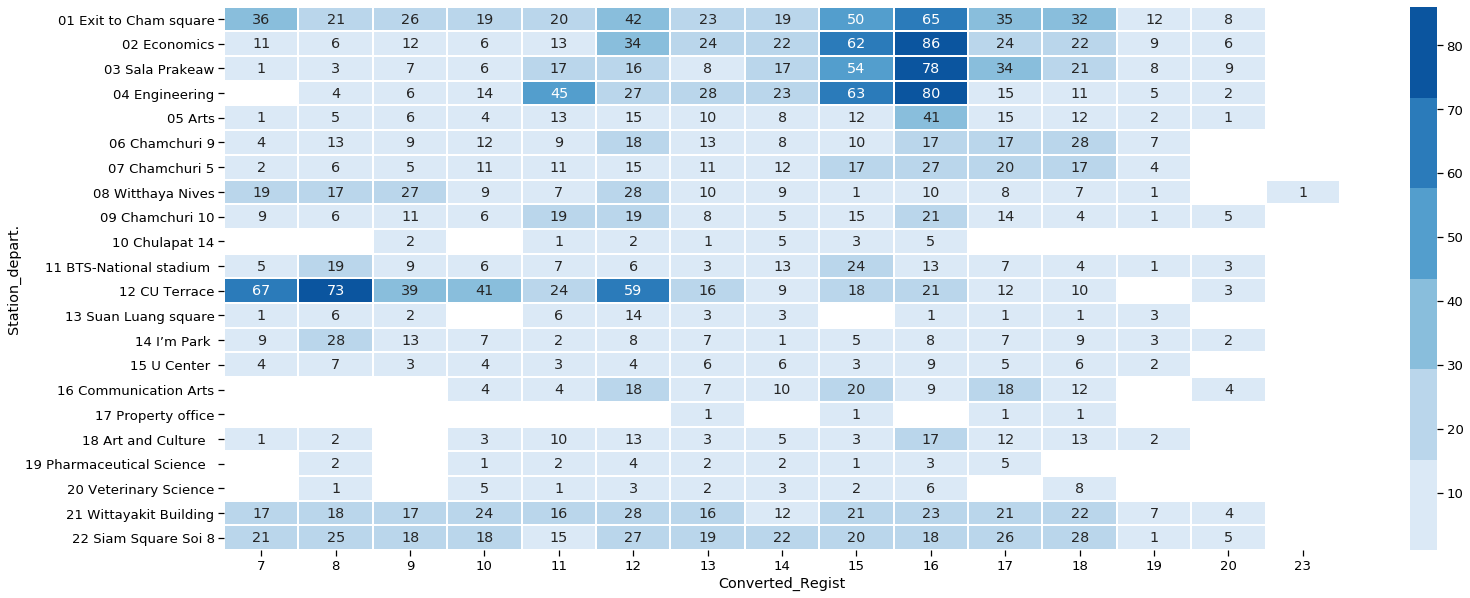

In [13]:
df_merged_s = df_merged[df_merged['Day'] == '1 - mon']
df_merged_hm = df_merged_s.pivot_table(index='Station_depart.', columns='Converted_Regist', values='Demand', aggfunc=np.sum)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df_merged_hm, cmap=sns.color_palette("Blues"), annot=True, fmt='.0f', linewidths = 1)
# pd.crosstab(df_merged_s['Station_depart.'], df_merged_s['Converted_Regist'])

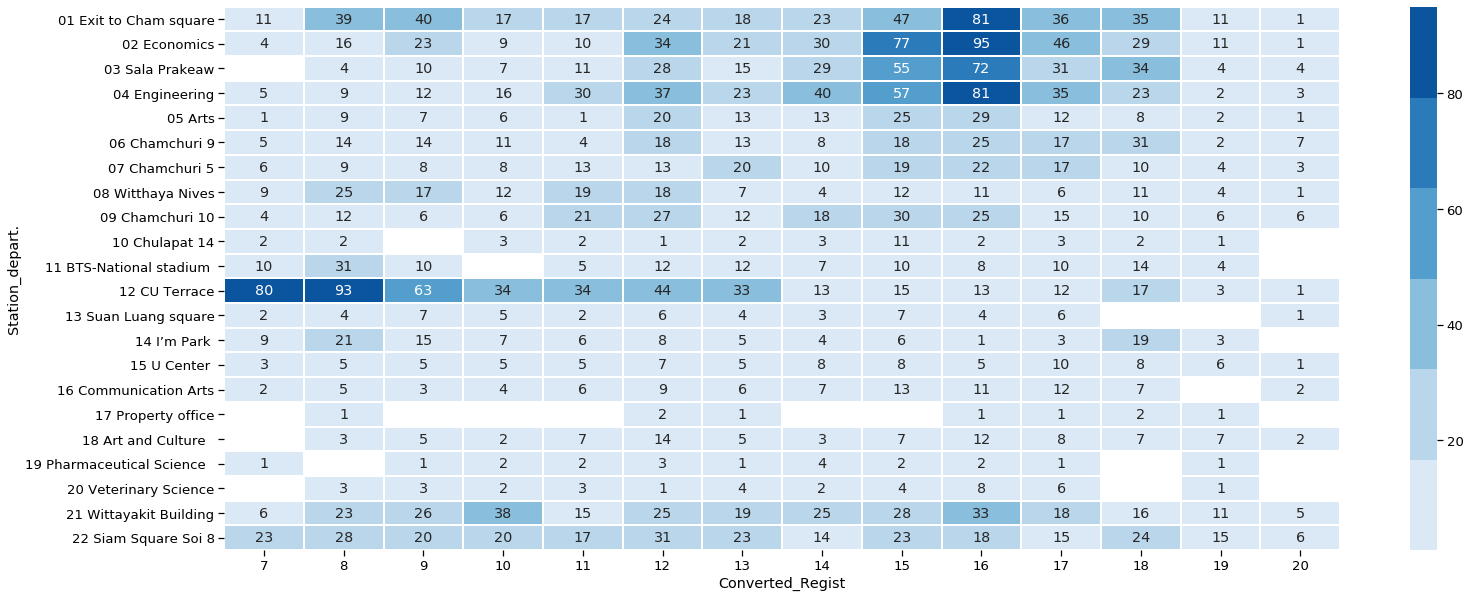

In [14]:
df_merged_s = df_merged[df_merged['Day'] == '2 - tue']

df_merged_hm = df_merged_s.pivot_table(index='Station_depart.', columns='Converted_Regist', values='Demand', aggfunc=np.sum)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df_merged_hm, cmap=sns.color_palette("Blues"), annot=True, fmt='.0f', linewidths = 1)
# pd.crosstab(df_merged_s['Station_depart.'], df_merged_s['Converted_Regist'])

In [ ]:
df_merged_s = df_merged[df_merged['Day'] == '3 - wed']

df_merged_hm = df_merged_s.pivot_table(index='Station_depart.', columns='Converted_Regist', values='Demand', aggfunc=np.sum)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df_merged_hm, cmap=sns.color_palette("Blues"), annot=True, fmt='.0f', linewidths = 1)
# pd.crosstab(df_merged_s['Station_depart.'], df_merged_s['Converted_Regist'])

In [ ]:
df_merged_s = df_merged[df_merged['Day'] == '4 - thu']

df_merged_hm = df_merged_s.pivot_table(index='Station_depart.', columns='Converted_Regist', values='Demand', aggfunc=np.sum)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df_merged_hm, cmap=sns.color_palette("Blues"), annot=True, fmt='.0f', linewidths = 1)
# pd.crosstab(df_merged_s['Station_depart.'], df_merged_s['Converted_Regist'])

In [ ]:
df_merged_s = df_merged[df_merged['Day'] == '5 - fri']

df_merged_hm = df_merged_s.pivot_table(index='Station_depart.', columns='Converted_Regist', values='Demand', aggfunc=np.sum)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df_merged_hm, cmap=sns.color_palette("Blues"), annot=True, fmt='.0f', linewidths = 1)
# pd.crosstab(df_merged_s['Station_depart.'], df_merged_s['Converted_Regist'])

In [ ]:
df_merged_s = df_merged[df_merged['Day'] == '6 - sat']

df_merged_hm = df_merged_s.pivot_table(index='Station_depart.', columns='Converted_Regist', values='Demand', aggfunc=np.sum)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df_merged_hm, cmap=sns.color_palette("Blues"), annot=True, fmt='.0f', linewidths = 1)
# pd.crosstab(df_merged_s['Station_depart.'], df_merged_s['Converted_Regist'])

In [ ]:
df_merged_dm = df_merged.pivot_table(index='Month', columns='Converted_Regist', values='Demand', aggfunc=np.sum)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df_merged_dm, cmap=sns.color_palette("Blues"), annot=True, fmt='.0f', linewidths = 1)

In [ ]:
from sklearn.cluster import KMeans

Kmean = KMeans(n_clusters=3)
X = df_merged[['Converted_Station', 'Converted_Regist', 'Usage\'']]
Kmean.fit(X)
Kmean.cluster_centers_

In [ ]:
# ax = plt.axes(projection='3d')

# # Data for a three-dimensional line
# zline = df_merged['Demand']
# xline = df_merged['Converted_Station_int']
# yline = df_merged['Converted_Regist']
# ax.plot3D(xline, yline, zline, 'gray')

# # Data for three-dimensional scattered points
# zdata = df_merged['Demand']
# xdata = df_merged['Converted_Station_int']
# ydata = df_merged['Converted_Regist']
# ax.contour3D(xdata, ydata, zdata, c=zdata, cmap='Blue');

In [18]:
from sklearn.model_selection import train_test_split
X = df_merged[['Station_depart_int', 'Station_dest_int', 'Converted_Regist', 'Day_int', 'Month_int']]
y = df_merged[['Demand']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [20]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 42)
regressor.fit(X, y)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [21]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
# plt.scatter(X, y, color = 'red')
# plt.plot()

TypeError: unsupported operand type(s) for -: 'str' and 'str'

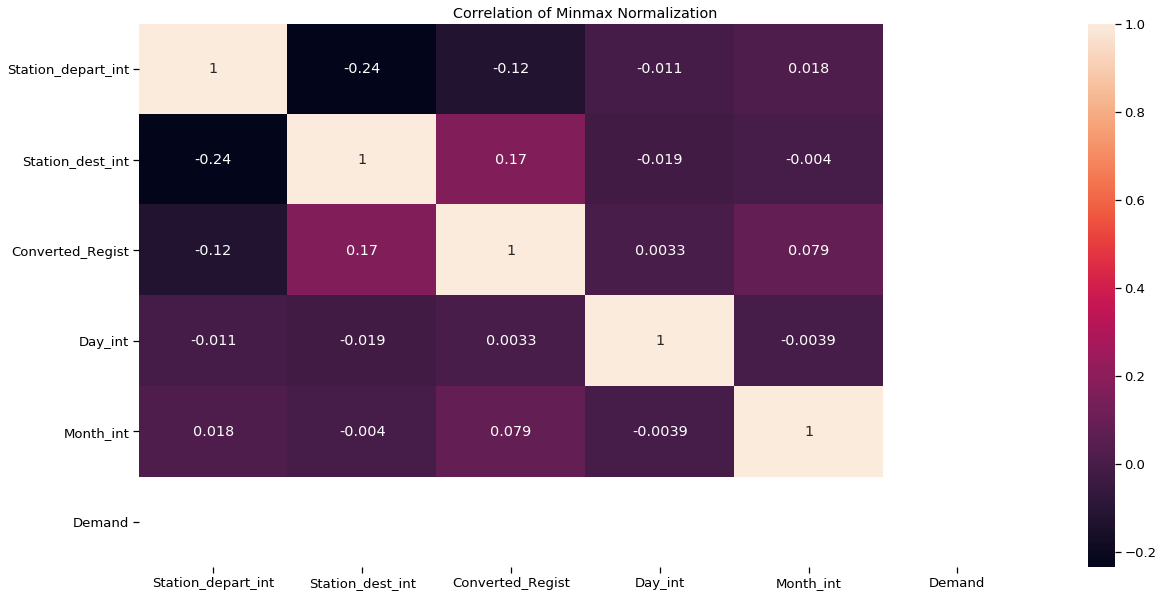

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

col = ['Station_depart_int', 'Station_dest_int', 'Converted_Regist', 'Day_int', 'Month_int', 'Demand']
df_use = df_merged[col]
df_minmax = pd.DataFrame(MinMaxScaler().fit_transform(df_use), columns=df_use.columns)
# df_standard = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)
y = df_minmax[['Demand']]
# y2 = df_standard[['num_critic_for_reviews']]

corr_minmax = df_minmax.corr()

plt.figure(figsize=(20,10))
plt.title('Correlation of Minmax Normalization')
sns.heatmap(corr_minmax, annot=True)
plt.show()

In [39]:
X1 = df_minmax[['Station_depart_int', 'Station_dest_int', 'Converted_Regist', 'Day_int', 'Month_int']]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.3, random_state=42)

Slope: [[0. 0. 0. 0. 0.]]
Intercept: [0.]
Root mean squared error:  0.0
Mean absolute error:  0.0
R2 score:  1.0


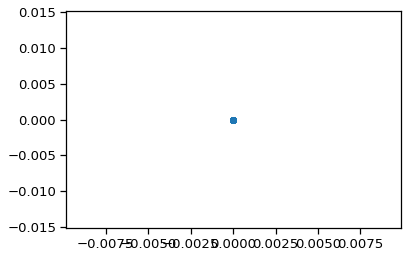

In [40]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
regression_model_1 = LinearRegression()
regression_model_1.fit(X1_train, y1_train)
y_predicted_1 = regression_model_1.predict(X1_test)

rmse = mean_squared_error(y1_test, y_predicted_1)
mae = mean_absolute_error(y1_test, y_predicted_1)
r2 = r2_score(y1_test, y_predicted_1)
plt.scatter(y1_test, y_predicted_1)

print('Slope:' ,regression_model_1.coef_)
print('Intercept:', regression_model_1.intercept_)
print('Root mean squared error: ', rmse)
print('Mean absolute error: ', mae)
print('R2 score: ', r2)